### Role of Optimizer
When training a deep learning model, you must adapt every epoch's weight and minimize the loss function. An optimizer is an algorithm or function that adapts the neural network's attributes, like learning rate and weights. Hence, it assists in improving the accuracy and reduces the total loss.


## Challenge in Gradient Descent
- Learing rate :
\begin{gather*}
W_n=W_n - \eta\frac{dW_n}{dx}
\end{gather*}
       - learning rate scheduling(predefine)
       
- Same learning rate and direction
- local minimum
- saddle point 

## Optimzer
- Momemtum
- ADA-graud
- NAG
- RMSprop
- Adam

### Exponentially moving average
- It is technique which find trends on time series data.
- It is used in time series forcasting, financial forecasting, signal processing, Deep learning optimizers.
- Wieghted of data point is reduce w.r.t time

$$
  V_{t} = \beta.V_{t-1} + \theta_{t}(1-\beta)
$$ 

- larger $\beta$ value more will be weighted

In [8]:
df = pd.read_csv("dailytemp.csv",nrows=1000)
df.head()

,Date,Daily minimum temperatures
0,1/1/1981,20.7
1,1/2/1981,17.9
2,1/3/1981,18.8
3,1/4/1981,14.6
4,1/5/1981,15.8


In [9]:
df.columns = df.columns.str.replace("Daily minimum temperature","temp")

In [10]:
df

,Date,temps
0,1/1/1981,20.7
1,1/2/1981,17.9
2,1/3/1981,18.8
3,1/4/1981,14.6
4,1/5/1981,15.8
...,...,...
995,9/23/1983,12.9
996,9/24/1983,7.7
997,9/25/1983,7.6
998,9/26/1983,3.5


In [26]:
df["Date"]=pd.to_datetime(df["Date"])
df.head()

,Date,temps
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


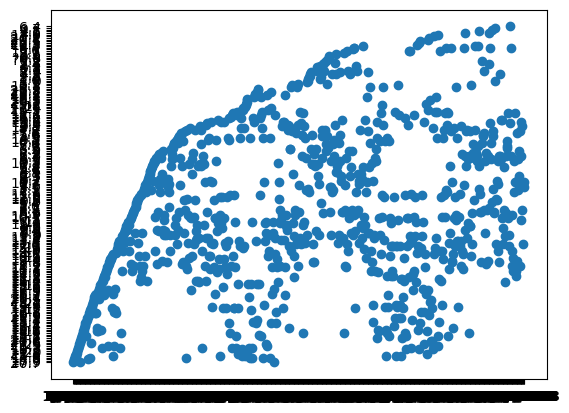

In [11]:
plt.scatter(df["Date"],df["temps"])

In [23]:
x=df["temps"].ewm(alpha=0.9).mean

In [25]:
x

<bound method ExponentialMovingWindow.mean of ExponentialMovingWindow [alpha=0.9,min_periods=1,adjust=True,ignore_na=False,axis=0,method=single]>

## Optimization technique
### SGD momentum
- $ W_{t+1} = W_t + \eta\Delta.W_t$
- $ V_t = \beta .V_{t+1} + \eta\Delta w_t $
 :where $\beta$ ts called decaying velocity
 
**Advantage of momentum**
- momentum is faster 
- escape local minimum

**Disadvantage**
- slow near to optimum solution due to oscilation

In [32]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/GCvWD9zIF-s" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>')

C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\IPython\core\display.py:431: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


## NAG(Nesterov Accelerated Gradient)

The acceleration of momentum can overshoot the minima at the bottom of basins or valleys. Nesterov momentum is an extension of momentum that involves calculating the decaying moving average of the gradients of projected positions in the search space rather than the actual positions themselves.

This has the effect of harnessing the accelerating benefits of momentum whilst allowing the search to slow down when approaching the optima and reduce the likelihood of missing or overshooting it.

- history of velocity
- gradient at that point
- look ahead terms

**NAG Dammped in oscillatory leads to converge to local minmum**

tf keras optimizers SGD{
learning rate=0.01, momentum=0.1,nesterov=False, name="SGD"
}
nestorov false for Momemtum, True for NAG 

## AdaGrad (Adaptive Gradient)
Adaptive Gradient Algorithm (Adagrad) is an algorithm for gradient-based optimization. The learning rate is adapted component-wise to the parameters by incorporating knowledge of past observations.

features-> sparse {mean most of the values are zero}

**BatchGD and Momentum could coverge slow in spare datasets, weight update in sparse columns is less in compare to non sparse columns**

### AdaGrad Elongated bowl problem
- due to presence of sparse feature forming  ellipsoid
- In AdaGrad set different learning rate for different parameter 

\begin{gather*} W_{t+1} = W_t - \eta\Delta.\frac{W_t}{\sqrt{v +\epsilon }} \end{gather*}

\begin{gather*} b_{t+1} = b_t - \eta\Delta.\frac{b_t}{\sqrt{v +\epsilon }} \end{gather*}

## Disadvatage
- Does not converge to solution due to oscillation at centre
- it works on only convex problem like tnear regression

# Root Mean Square Prop
Root Mean Squared Propagation, or RMSProp, is an extension of gradient descent and the AdaGrad version of gradient descent that uses a decaying average of partial gradients in the adaptation of the step size for each parameter.

- It wotks also on non convex Problem
- Its is an exponentially decaying weighted avearge

- $ v_t = v_{t-1} + (\Delta w_t)^2 $
- $ w_{t-1} = w_t + \eta\Delta \frac{\Delta w_t}{\sqrt{v_t +\epsilon}} $

## Adam(Adaptive momet Estimstion)
Adaptive Moment Estimation is an algorithm for optimization technique for gradient descent. The method is really efficient when working with large problems involving a lot of data or parameters. It requires less memory and is efficient. Intuitively, it is a combination of the ‘gradient descent with momentum’ algorithm and the ‘RMSP’ algorithm.
- uses both momemtum and Adagrad
- $ w_{t-1} = w_t + \frac{\eta}{\sqrt{v_t +\epsilon}} m_t$

**There are more optimizers like AdaDelta, AdaExpo**
**It is wise to start with Ada then move to other**